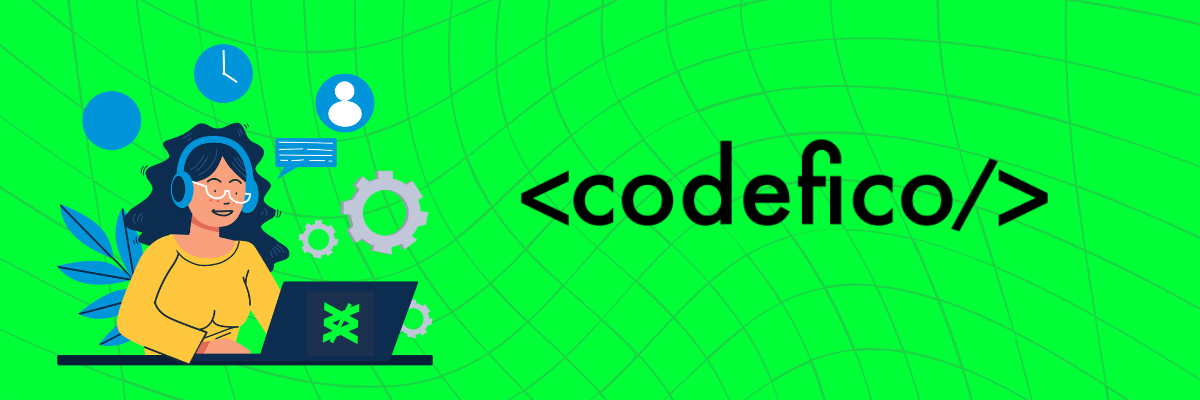

**Utilize o sistema cliente que vocês programaram na sexta (aula 8), na máquina com o seguinte ip: 143.244.187.133, existe uma porta que caso vocês a encontrem e utilizem senha receberão uma mensagem dizendo “Acesso concedido!”, para isso desenvolva e execute um algoritmo de força bruta para testar todas as combinações possíveis e encontrar a porta correta e a senha**

Dicas:

1-	A porta correta está no intervalo entre a porta 9060 e a porta 9080

2-	A senha é composta por 2 letras minusculas


In [ ]:
#cliente
import socket
import time

host = '0.0.0.0'
portas = range(9070,9080)

def main():

    for porta in portas:
        for letra1 in range(97,123):
            for letra2 in range(97,123):
              senha = chr(letra1) + chr(letra2)
              print(f"Tentando porta {porta} e senha {senha}")

              cliente = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

              try:
                cliente.connect((host,porta))
                cliente.send(senha.encode())
                resposta = cliente.recv(1024).decode()
                if resposta == "Acesso concedido":
                  print(f"Senha e porta corretas: {senha},{porta}")
                  return
              except ConnectionRefusedError:
                pass
              except BlockingIOError:
                time.sleep(1)
              finally:
                cliente.close()

main()


In [ ]:
#servidor
import socket

def main():
    host = '0.0.0.0'
    port = 9072
    senha_correta = "kz"

    servidor = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    servidor.bind((host, port))
    servidor.listen(1)

    print(f"Servidor ouvindo na porta {port}...")

    while True:
        conn, addr = servidor.accept()
        print(f"Conexão de {addr[0]}:{addr[1]} - Tentativa de conexão")

        senha = conn.recv(1024).decode()
        if senha == senha_correta:
            conn.send("Acesso concedido".encode())
            print(f"Conexão de {addr[0]}:{addr[1]} - Acesso concedido")
        else:
            conn.send("Acesso negado".encode())
            print(f"Conexão de {addr[0]}:{addr[1]} - Acesso negado")
        
if __name__ == "__main__":
    main()


**Exemplo de execução no terminal linux:**<br>
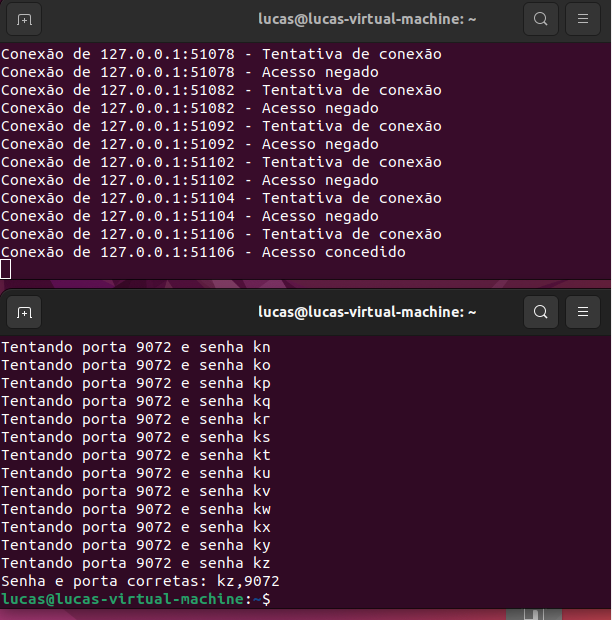